# Likelihood curves vs parameters


This notebook explores how the likelihood returned by the Kalman filter varies with respect to the choice of model parameters 

It uses the new parameterisation desvribed in `06.Pulsar_terms_success.ipynb`


---

### Setup

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
import sys
import json 
import pandas as pd 
try:
    sys.path.remove("../../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../../py_src") # Means that I dont have to make src/ a proper python package

### Define some functions 

Now to start, lets make a function that creates some synthetic data for a particular strain, measurement noise and noise seed AND a function that gets a likelihood value given that data 

In [12]:
from system_parameters import SystemParameters


In [13]:
from system_parameters import SystemParameters
from pulsars import Pulsars
from synthetic_data import SyntheticData
from model import LinearModel
from kalman_filter import KalmanFilter
from priors import priors_dict,bilby_priors_dict
import numpy as np 


#Function to create synthetic data
def create_synthetic_data(h,measurement_noise,seed):

    P    = SystemParameters(h=h,σp=None,σm=measurement_noise,seed=seed)       #define the system parameters as a class
    PTA  = Pulsars(P)               # setup the PTA
    data = SyntheticData(PTA,P)     # generate some synthetic data

    return P,PTA,data

#Fit model to data and return likelihood
def get_likelihood(data,parameter_name,parameter_value,P,PTA,measurement_model):

    _P = copy.copy(P)
    _PTA = copy.copy(PTA)
    _P.measurement_model = measurement_model
    

    #Define the model 
    model = LinearModel(_P)

    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.f_measured,_PTA)

    #Get the
    guessed_parameters = priors_dict(_PTA,_P) #These are the true parameters 
    #print("value before:",guessed_parameters[parameter_name] )
    #guessed_parameters[parameter_name] = np.array([parameter_value])
    guessed_parameters[parameter_name] = parameter_value

    #print("value after:",guessed_parameters[parameter_name] )

    
    model_likelihood = KF.likelihood(guessed_parameters)

    return model_likelihood



def get_waveform(data,parameter_name,parameter_value,P,PTA,measurement_model):



    _P = copy.copy(P)
    _PTA = copy.copy(PTA)
    _P.measurement_model = measurement_model
    

    #Define the model 
    model = LinearModel(_P)

    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.f_measured,_PTA)

    #Get the
    guessed_parameters = priors_dict(_PTA,_P) #These are the true parameters 

    for key,item in guessed_parameters.items():
        print(key,item)
    guessed_parameters[parameter_name] = np.array([parameter_value])

    
    model_likelihood,xresults,yresults = KF.likelihood_with_results(guessed_parameters)

    return yresults

Iterate over all parameters:

In [14]:
#Set the measurement model again
measurement_model = 'pulsar' #Set the measurement model 


parameter_names = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
N = int(1e3)
parameter_ranges = [np.logspace(-9,-5,N),
                    np.linspace(-1.0,1.0,N),
                    np.linspace(2.0,3.0,N),
                    np.linspace(0.5,1.5,N),
                    np.linspace(0.0,1.5,N),
                    np.linspace(0.5,1.5,N),
                    np.logspace(-13,-11,N)
]



likelihood_data_dictionary={}


for j,parameter_name in enumerate(parameter_names):
    parameter_range = parameter_ranges[j]
    likelihood_data_array = np.zeros(len(parameter_range))     
      

    for i,p in enumerate(parameter_range):
        p = parameter_range[i]
        likelihood_data_array[i] = get_likelihood(data,parameter_name,p,P,PTA,measurement_model)

    likelihood_data_dictionary[parameter_name] = likelihood_data_array

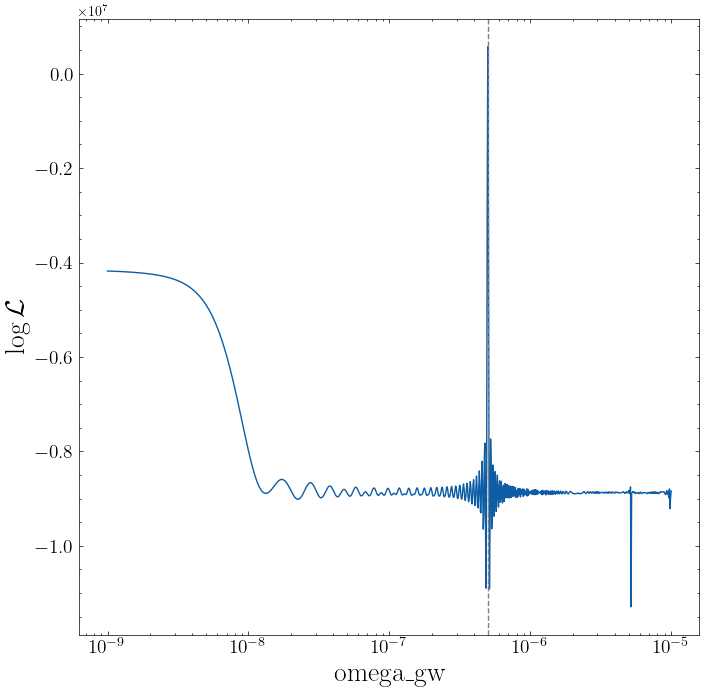

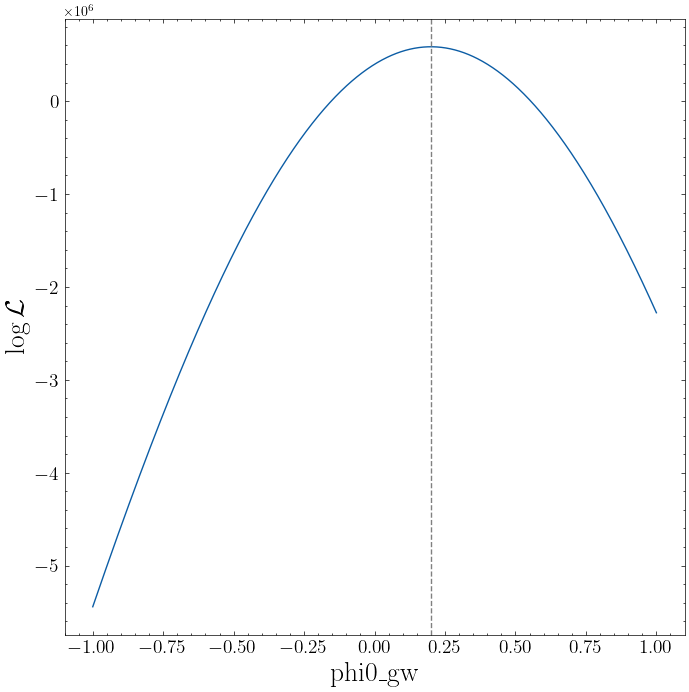

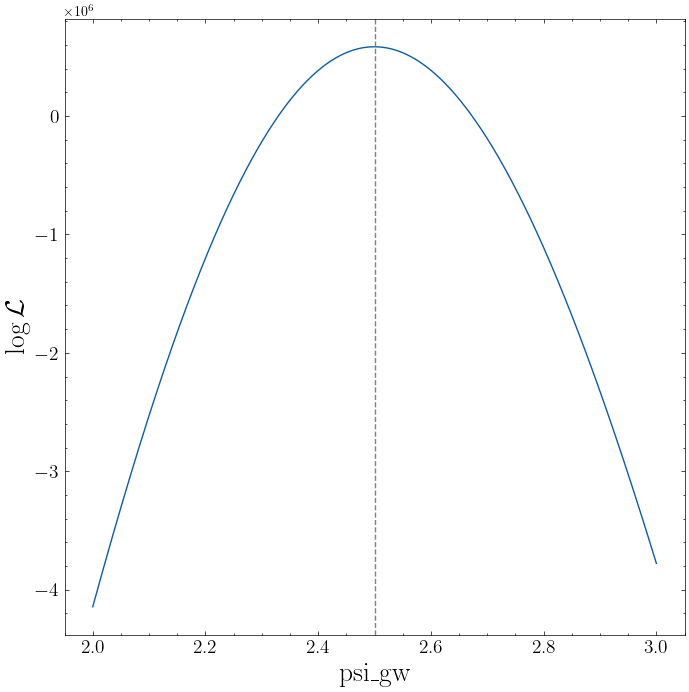

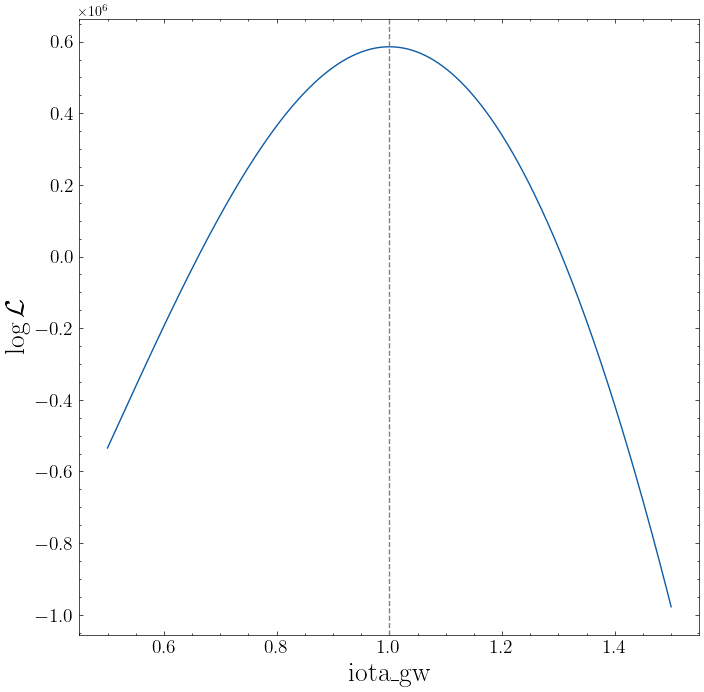

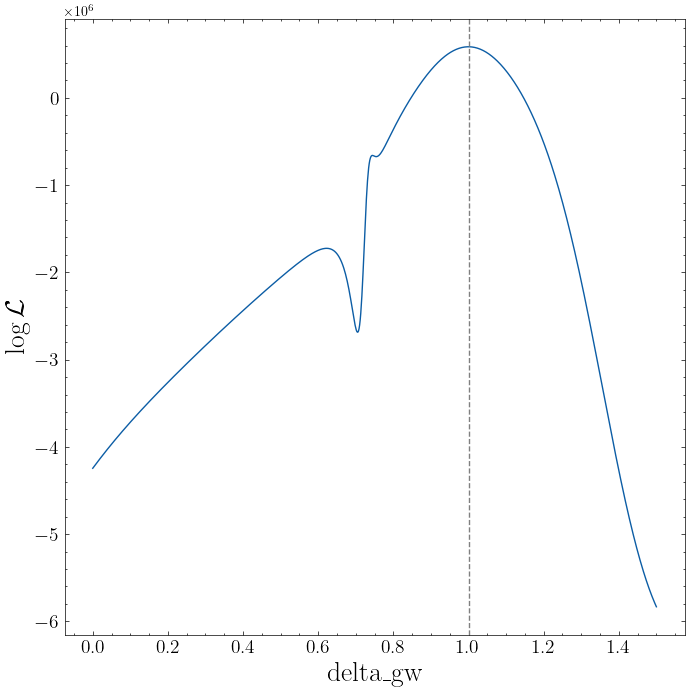

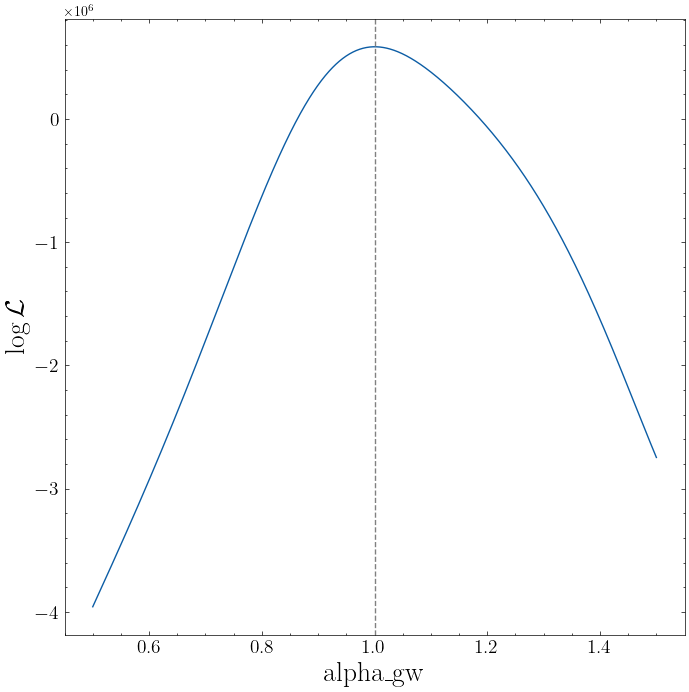

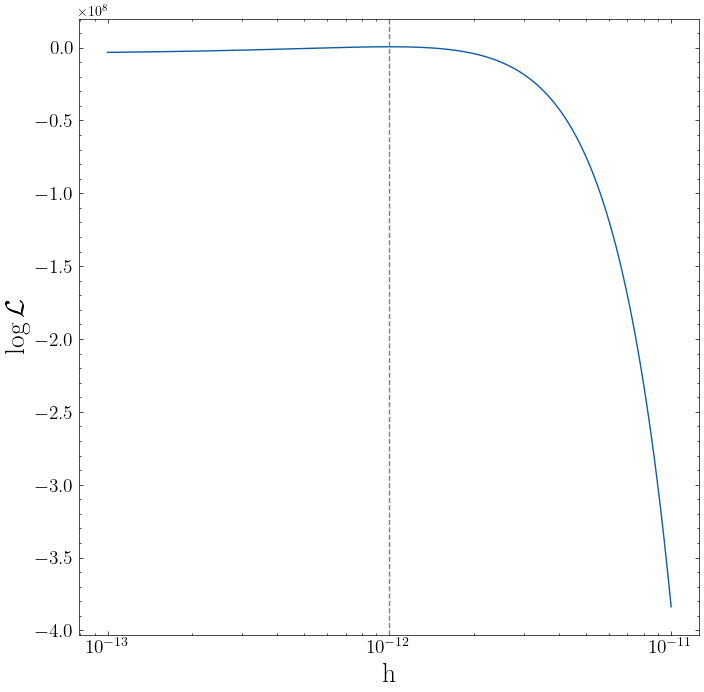

In [15]:
#And plot it all
log_axes = ["omega_gw","h"]
injection_values = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-12]
for j,parameter_name in enumerate(parameter_names):
    if parameter_name in log_axes:
        log_x_axes=True
    else:
        log_x_axes=False
    plot_likelihood(parameter_ranges[j],likelihood_data_dictionary[parameter_name],parameter_name,log_x_axes=log_x_axes,injection=injection_values[j])


Most of the curves reamain smooth, but $\Omega$, $\delta$ and and $\alpha$ are super noisy


### What about with just the Earth terms?


Lets do the same again, but drop the pulsar terms

In [ ]:
#Set the measurement model again
measurement_model = 'earth' #Set the measurement model 

parameter_names = ["omega_gw","phi0_gw","psi_gw","iota_gw","delta_gw","alpha_gw", "h"]
N = int(1e3)
parameter_ranges = [np.logspace(-9,-5,N),
                    np.linspace(-1.0,1.0,N),
                    np.linspace(2.0,3.0,N),
                    np.linspace(0.5,1.5,N),
                    np.linspace(0.5,1.5,N),
                    np.linspace(0.5,1.5,N),
                    np.logspace(-13,-11,N)
]



likelihood_data_dictionary_earth={}


for j,parameter_name in enumerate(parameter_names):
    parameter_range = parameter_ranges[j]
    likelihood_data_array = np.zeros(len(parameter_range))     
      

    for i,p in enumerate(parameter_range):
        p = parameter_range[i]
        likelihood_data_array[i] = get_likelihood(data,parameter_name,p,P,PTA,measurement_model)

    likelihood_data_dictionary_earth[parameter_name] = likelihood_data_array

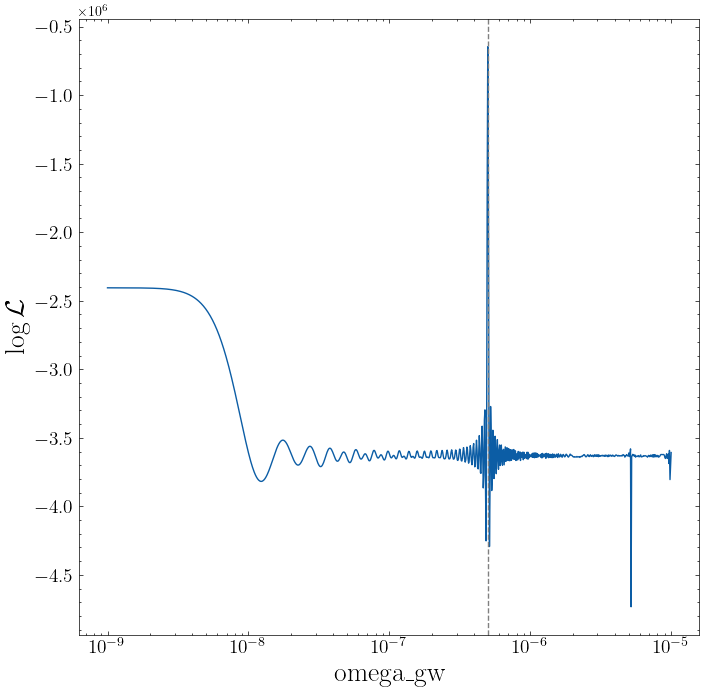

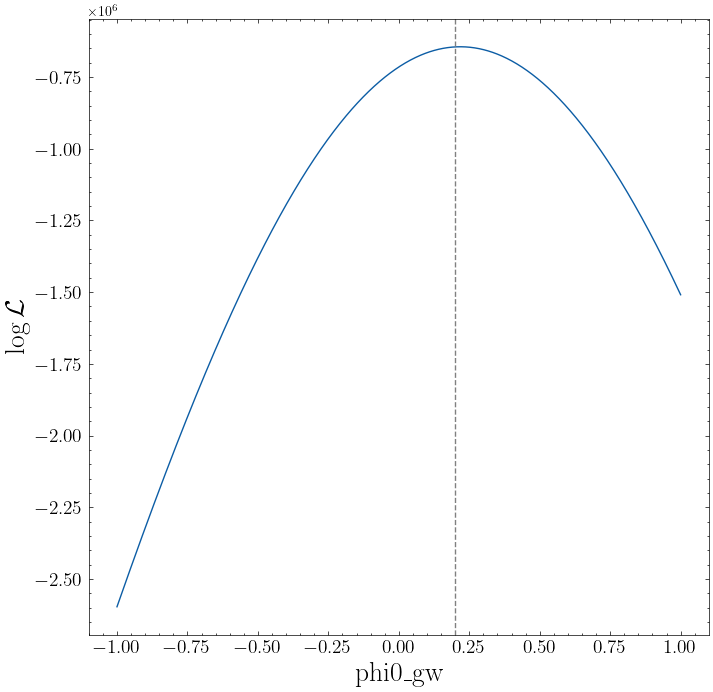

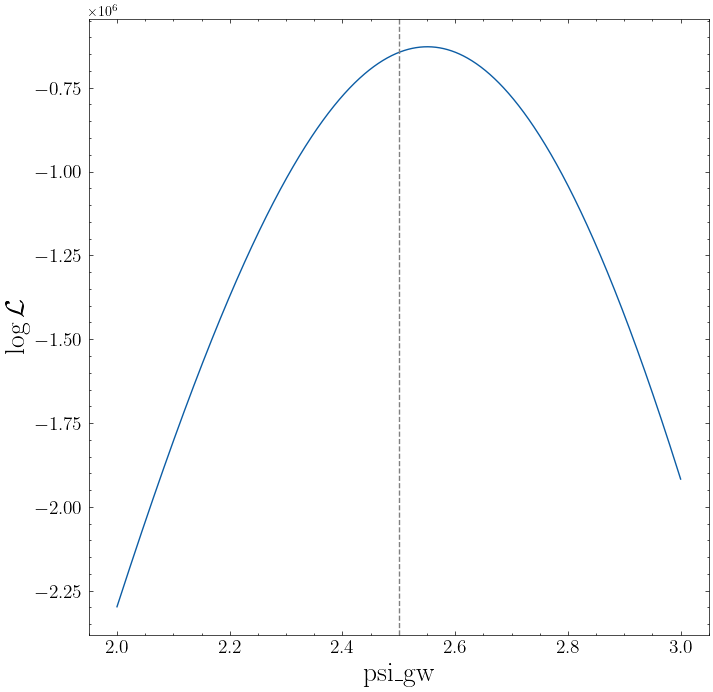

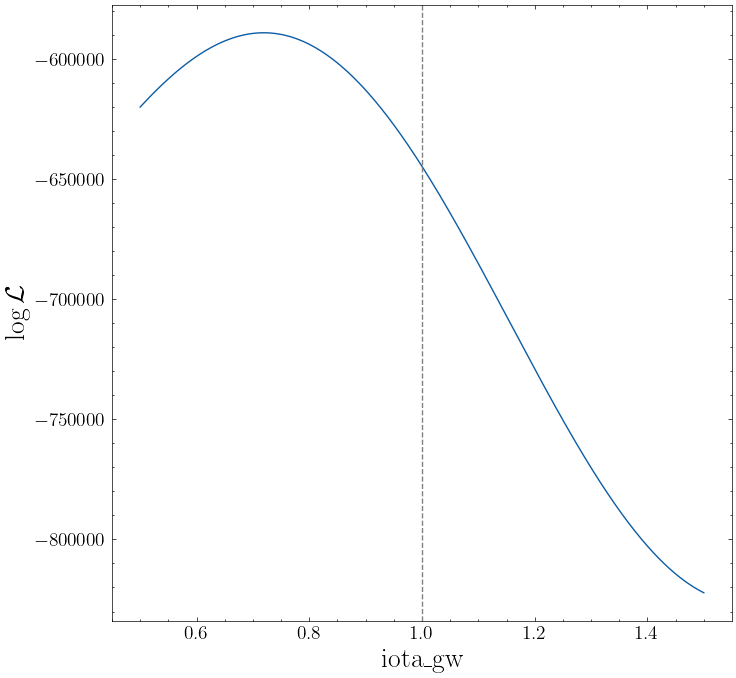

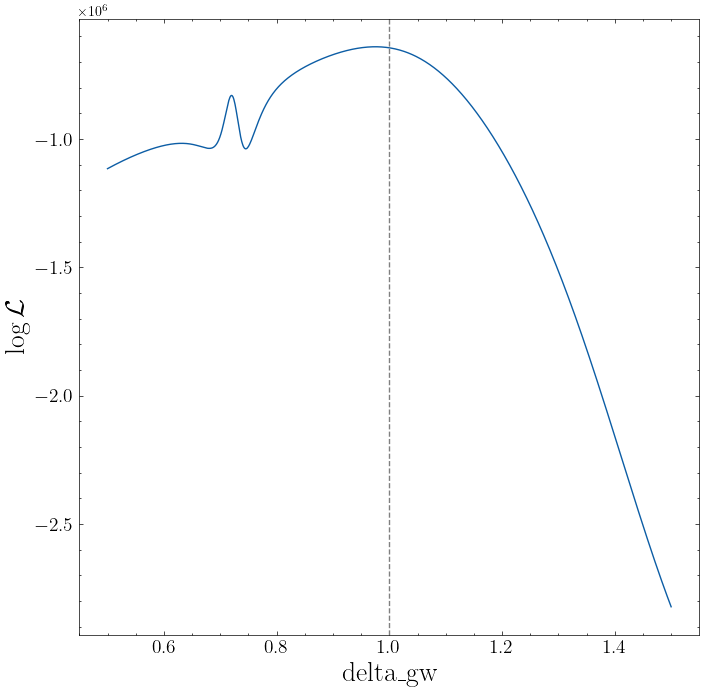

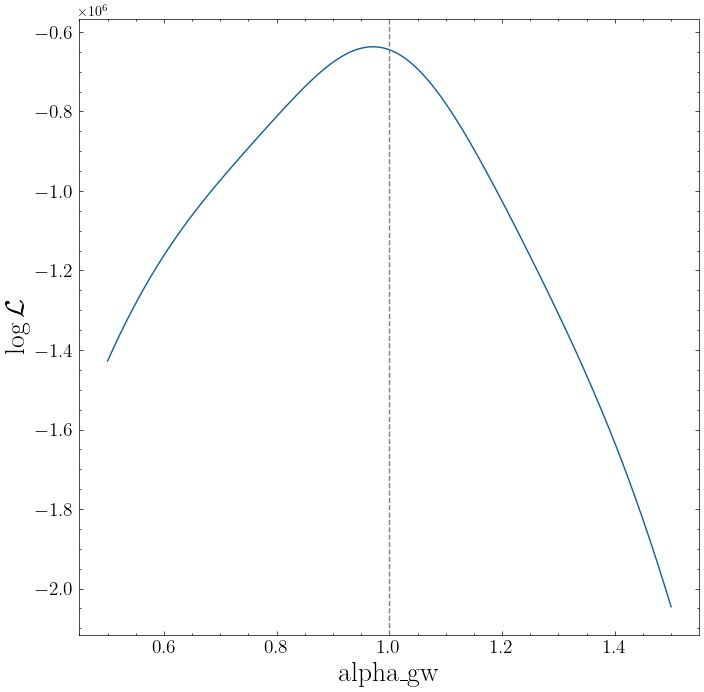

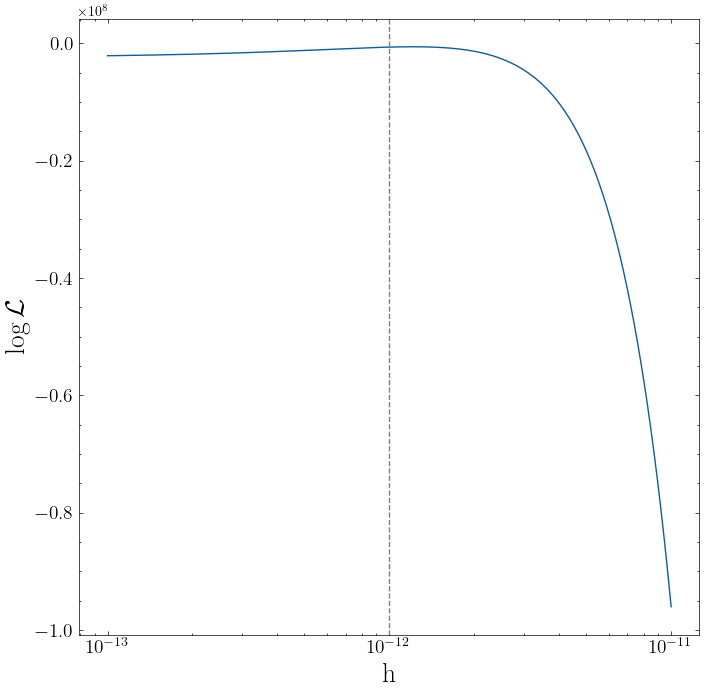

In [ ]:
#And plot it all
log_axes = ["omega_gw","h"]
injection_values = [5e-7,0.20,2.50,1.0,1.0,1.0,1e-12]
for j,parameter_name in enumerate(parameter_names):
    if parameter_name in log_axes:
        log_x_axes=True
    else:
        log_x_axes=False
    plot_likelihood(parameter_ranges[j],likelihood_data_dictionary_earth[parameter_name],parameter_name,log_x_axes=log_x_axes,injection=injection_values[j])
